## Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
from torch.optim import SGD
import matplotlib.pyplot as plt

## Data

In [2]:
df = pd.read_csv("/content/sample_data/diabetes.csv")
print(df.shape)
num_samples, num_features = df.shape
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# X = df.drop(["Outcome"], axis=1).values
X = df.drop(["Outcome"], axis=1).to_numpy()
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [4]:
y = df["Outcome"].values.reshape(-1, 1)
y.shape

(768, 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614, 1), (154, 1))

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((552, 8), (62, 8), (552, 1), (62, 1))

In [7]:
x_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)
X_valid = x_scaler.transform(X_valid)
X_test = x_scaler.transform(X_test)

In [8]:
X_train

array([[ 0.93487472,  0.48500703,  1.08725796, ...,  0.02085495,
        -0.22717681,  0.50956881],
       [-0.85386304, -0.87186554, -0.49824678, ..., -1.0083576 ,
        -0.6289772 , -0.95633974],
       [-0.85386304, -1.06570448,  0.34735575, ..., -0.08079567,
        -0.83754535, -0.87010982],
       ...,
       [ 0.04050584, -0.16112276, -0.39254646, ..., -0.27139059,
        -0.26091577, -0.26650042],
       [ 0.63675176, -0.93647852, -1.02674836, ..., -0.39845386,
        -0.33452806, -0.87010982],
       [ 1.23299768, -0.54880064,  1.61575953, ...,  1.45666999,
        -0.69338795,  1.02694829]])

In [9]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

(torch.Size([552, 8]),
 torch.Size([552, 1]),
 torch.Size([62, 8]),
 torch.Size([62, 1]),
 torch.Size([154, 8]),
 torch.Size([154, 1]))

In [10]:
train_set = TensorDataset(X_train, y_train)
valid_set = TensorDataset(X_valid, y_valid)
test_set = TensorDataset(X_test, y_test)

In [11]:
train_set[10:15]

(tensor([[ 0.6368,  2.3265,  0.4531, -1.2804, -0.7059, -1.0592, -1.0308,  2.2342],
         [ 0.6368,  0.0973,  0.3474, -1.2804, -0.7059,  0.2496, -1.0553,  1.8030],
         [-0.8539,  0.5496, -0.3925,  1.3333,  3.5420,  1.1263,  0.2176, -1.0426],
         [-0.5557,  2.4234,  0.0303,  1.5883,  4.0996, -0.1697, -0.9418,  1.7168],
         [ 1.8292,  0.5496,  0.5588, -1.2804, -0.7059, -0.6018,  2.9934,  2.0617]]),
 tensor([[1.],
         [1.],
         [0.],
         [1.],
         [0.]]))

In [12]:
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=32)
test_loader = DataLoader(test_set, batch_size=154)

In [13]:
x_batch, y_batch = next(iter(train_loader))
x_batch.shape, y_batch.shape

(torch.Size([32, 8]), torch.Size([32, 1]))

In [14]:
len(train_loader)

18

## Model

In [15]:
model = nn.Linear(in_features=8, out_features=1)
model

Linear(in_features=8, out_features=1, bias=True)

In [16]:
# y_hat = torch.sigmoid(model(x_batch))
# y_hat

In [17]:
model = nn.Sequential(
    nn.Linear(8, 1),
    nn.Sigmoid())

In [18]:
y_hat = model(x_batch)
y_hat.shape

torch.Size([32, 1])

In [19]:
model[0], model[1], model[0].weight, model[0].bias

(Linear(in_features=8, out_features=1, bias=True),
 Sigmoid(),
 Parameter containing:
 tensor([[ 0.2646,  0.1813, -0.3472,  0.2677, -0.0745, -0.2941, -0.1332,  0.3295]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.2208], requires_grad=True))

## Loss

In [20]:
loss_fn = nn.BCELoss()
loss_fn

BCELoss()

In [21]:
loss_fn(y_hat, y_batch)

tensor(0.7798, grad_fn=<BinaryCrossEntropyBackward0>)

## Optimizer

In [22]:
optimizer = SGD(model.parameters(), lr=0.1, momentum=0.9)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

## Train

In [27]:
n_epoch = 20
loss_train_hist, loss_valid_hist = [], []
acc_train_hist, acc_valid_hist = [], []

In [28]:
for epoch in range(n_epoch):
    mean_loss_train = mean_loss_valid = 0
    mean_acc_train = mean_acc_valid = 0

    for x_batch, y_batch in train_loader:
        # model
        y_hat = model(x_batch)
        # loss
        loss = loss_fn(y_hat, y_batch)
        # gradient
        loss.backward()
        # update
        optimizer.step()
        optimizer.zero_grad()

        mean_loss_train += loss.item() * len(x_batch)
        mean_acc_train += torch.sum(y_hat.round() == y_batch).item()

    mean_loss_train = mean_loss_train/len(train_set)
    mean_acc_train = mean_acc_train/len(train_set)
    loss_train_hist.append(mean_loss_train)
    acc_train_hist.append(mean_acc_train)

    with torch.no_grad():
        for x_batch, y_batch in valid_loader:
            y_hat = model(x_batch)
            loss = loss_fn(y_hat, y_batch)
            mean_loss_valid += loss.item() * len(x_batch)
            mean_acc_valid += torch.sum(y_hat.round() == y_batch).item()

        mean_loss_valid = mean_loss_valid/len(valid_set)
        mean_acc_valid = mean_acc_valid/len(valid_set)
        loss_valid_hist.append(mean_loss_valid)
        acc_valid_hist.append(mean_acc_valid)

    # print(epoch, mean_loss_train/len(train_set), mean_acc_train/len(train_set),
    #       mean_loss_valid/len(valid_set), mean_acc_valid/len(valid_set))
    print(
        f"Epoch: {epoch}    "
        f"LossTrain: {mean_loss_train:.2}    "
        f"AccTrain : {mean_acc_train:.2}    "
        f"LossValid: {mean_loss_valid:.2}    "
        f"AccValid : {mean_acc_valid:.2}    "
    )

Epoch: 0    LossTrain: 0.51    AccTrain : 0.76    LossValid: 0.54    AccValid : 0.76    
Epoch: 1    LossTrain: 0.5    AccTrain : 0.75    LossValid: 0.52    AccValid : 0.77    
Epoch: 2    LossTrain: 0.5    AccTrain : 0.75    LossValid: 0.53    AccValid : 0.76    
Epoch: 3    LossTrain: 0.5    AccTrain : 0.76    LossValid: 0.53    AccValid : 0.77    
Epoch: 4    LossTrain: 0.5    AccTrain : 0.76    LossValid: 0.55    AccValid : 0.74    
Epoch: 5    LossTrain: 0.51    AccTrain : 0.75    LossValid: 0.54    AccValid : 0.77    
Epoch: 6    LossTrain: 0.5    AccTrain : 0.75    LossValid: 0.51    AccValid : 0.74    
Epoch: 7    LossTrain: 0.5    AccTrain : 0.75    LossValid: 0.54    AccValid : 0.76    
Epoch: 8    LossTrain: 0.51    AccTrain : 0.74    LossValid: 0.53    AccValid : 0.74    
Epoch: 9    LossTrain: 0.5    AccTrain : 0.75    LossValid: 0.54    AccValid : 0.77    
Epoch: 10    LossTrain: 0.5    AccTrain : 0.75    LossValid: 0.54    AccValid : 0.76    
Epoch: 11    LossTrain: 0.5 

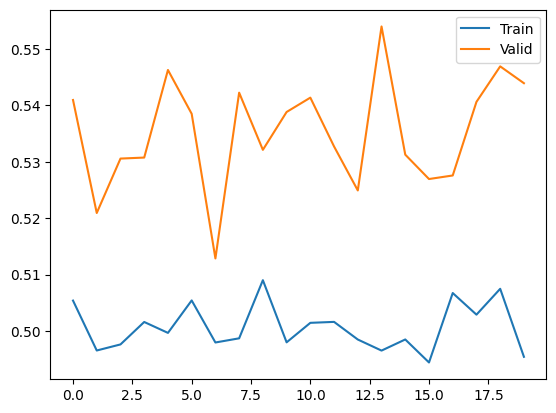

In [29]:
plt.plot(torch.arange(n_epoch), loss_train_hist)
plt.plot(torch.arange(n_epoch), loss_valid_hist)
plt.legend(["Train", "Valid"])

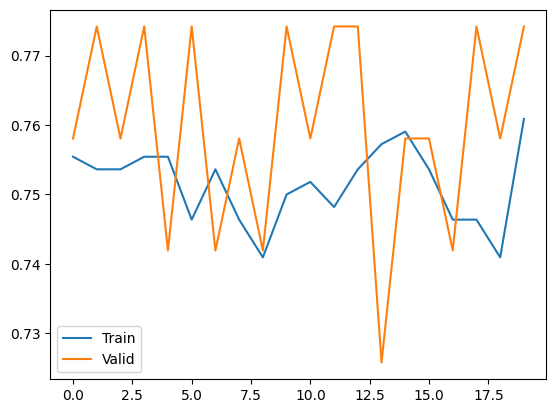

In [30]:
plt.plot(torch.arange(n_epoch), acc_train_hist)
plt.plot(torch.arange(n_epoch), acc_valid_hist)
plt.legend(["Train", "Valid"])

## Test

In [31]:
mean_acc_test = 0
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        y_hat = model(x_batch)
        mean_acc_test += torch.sum(y_hat.round() == y_batch).item()
    mean_acc_test = mean_acc_test/len(test_set)

mean_acc_test

0.8506493506493507